# Implementación del algoritmo de Deutsch-Jozsa

In [136]:
from qiskit import QuantumCircuit, QuantumRegister, assemble, Aer
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.quantum_info.operators import Operator, Pauli


Supongamos que la función oráculo que nos da |x>|y> -> |x>|y XOR f(x) se implementa con el siguiente circuito:

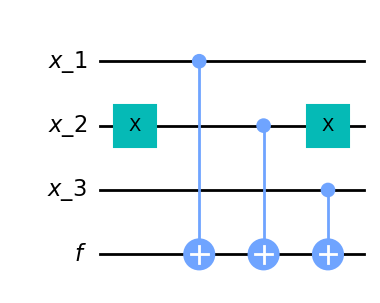

In [123]:

x_1 = QuantumRegister(1,'x_1')
x_2 = QuantumRegister(1,'x_2')
x_3 = QuantumRegister(1,'x_3')
f = QuantumRegister(1,'f')
circ = QuantumCircuit(x_1,x_2,x_3,f,name="f")

circ.x(x_2[0])
circ.cx(x_1[0],f[0])
circ.cx(x_2[0],f[0])
circ.cx(x_3[0],f[0])
circ.x(x_2[0])
circ.draw('mpl')



La tabla de verdad de f es:

| x_1 | x_2 | x_3 | y   |
| --- | --- | --- | --- |
| 0   | 0   | 0   | 1   |
| 0   | 0   | 1   | 0   |
| 0   | 1   | 0   | 0   |
| 0   | 1   | 1   | 1   |
| 1   | 0   | 0   | 0   |
| 1   | 0   | 1   | 1   |
| 1   | 1   | 0   | 1   |
| 1   | 1   | 1   | 0   |

que claramente es balanceada. Ahora tenemos que añadir puertas de Hadamard a cada qubit antes y despues del oráculo.

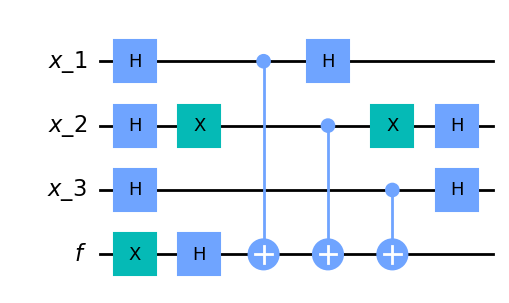

In [134]:
x_1 = QuantumRegister(1,'x_1')
x_2 = QuantumRegister(1,'x_2')
x_3 = QuantumRegister(1,'x_3')
f = QuantumRegister(1,'f')
circ = QuantumCircuit(x_1,x_2,x_3,f,name="f")

circ.h(x_1[0])
circ.h(x_2[0])
circ.h(x_3[0])
circ.x(f[0])
circ.h(f[0])



circ.x(x_2[0])
circ.cx(x_1[0],f[0])
circ.cx(x_2[0],f[0])
circ.cx(x_3[0],f[0])
circ.x(x_2[0])


circ.h(x_1[0])
circ.h(x_2[0])
circ.h(x_3[0])


circ.draw('mpl')

Ahora componemos con un circuito formado por bits clásicos para añadir la medición al final. 

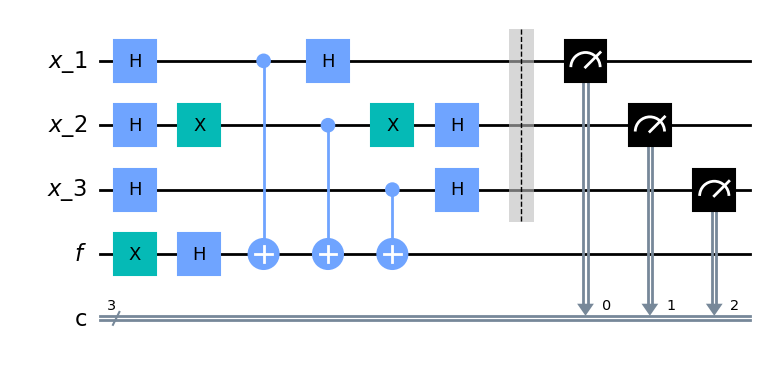

In [135]:
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
meas.measure(range(3), range(3))
circ.add_register(meas.cregs[0])
circ = circ.compose(meas)


circ.draw('mpl')

Por último realizamos la medición. 

In [126]:
simulator = AerSimulator()
circuit_compiled = transpile(circ,simulator)
trabajo_sim = simulator.run(circuit_compiled, shots = 1024)
result = trabajo_sim.result()

counts = result.get_counts(circuit_compiled)
print(counts)

{'111': 1024}


Como vemos, la probabilidad de obtener el valor 000 es nula, por lo que sabemos que la función es balanceada. 